**1. Load dataset, train Logistic Regression, and print accuracy**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
y = (y == 0).astype(int)  # Convert to binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


**2. Apply L1 regularization**

In [2]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
print("L1 Regularized Accuracy:", accuracy_score(y_test, model_l1.predict(X_test)))


L1 Regularized Accuracy: 1.0


**3. Apply L2 regularization**

In [3]:
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs')
model_l2.fit(X_train, y_train)
print("L2 Regularized Accuracy:", accuracy_score(y_test, model_l2.predict(X_test)))


L2 Regularized Accuracy: 1.0


**4. Apply Elastic Net Regularization**

In [4]:
model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model_en.fit(X_train, y_train)
print("Elastic Net Regularized Accuracy:", accuracy_score(y_test, model_en.predict(X_test)))


Elastic Net Regularized Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**5. Train Logistic Regression for multiclass using One-vs-Rest (OvR)**

In [5]:
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs')
model_ovr.fit(X_train, y_train)
print("OvR Accuracy:", accuracy_score(y_test, model_ovr.predict(X_test)))


OvR Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**6. Hyperparameter tuning with GridSearchCV**

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 1.0


**7. Evaluate using Stratified K-Fold Cross-Validation**

In [7]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Average Accuracy:", scores.mean())


Average Accuracy: 1.0


**8. Apply RandomizedSearchCV for hyperparameter **

In [8]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
Best Accuracy: 1.0


**9. Implement One-vs-One (OvO) Multiclass Logistic Regression**

In [9]:
model_ovo = LogisticRegression(multi_class='ovo', solver='lbfgs')
model_ovo.fit(X_train, y_train)
print("OvO Accuracy:", accuracy_score(y_test, model_ovo.predict(X_test)))


InvalidParameterError: The 'multi_class' parameter of LogisticRegression must be a str among {'auto', 'multinomial', 'ovr'}. Got 'ovo' instead.

**10. Train Logistic Regression and visualize confusion matrix**

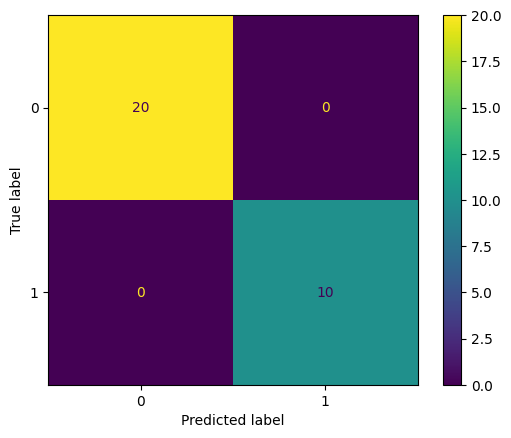

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


**11. Train Logistic Regression and evaluate Precision, Recall, and F1-Score**

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**12. Train Logistic Regression on imbalanced data using class weights**

In [12]:
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_train, y_train)
print("Weighted Model Accuracy:", accuracy_score(y_test, model_weighted.predict(X_test)))


Weighted Model Accuracy: 1.0


**13. Train Logistic Regression on Titanic dataset**

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv("titanic.csv")
df.fillna(df.mean(), inplace=True)

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
print("Titanic Model Accuracy:", accuracy_score(y_test, model.predict(X_test)))


FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

**14. Apply Standardization before Logistic Regression**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
print("Standardized Model Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))


Standardized Model Accuracy: 1.0


**15. Evaluate Logistic Regression using ROC-AUC score**

In [16]:
from sklearn.metrics import roc_auc_score

print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


ROC-AUC Score: 1.0


**16. Train Logistic Regression using custom learning rate (C=0.5)**

In [17]:
model_custom = LogisticRegression(C=0.5)
model_custom.fit(X_train, y_train)
print("Custom C Model Accuracy:", accuracy_score(y_test, model_custom.predict(X_test)))


Custom C Model Accuracy: 1.0


**17. Identify important features using model coefficients**

In [18]:
import numpy as np

coefs = np.abs(model.coef_)
important_features = np.argsort(coefs[0])[-5:]  # Get top 5 features
print("Top 5 Important Features:", important_features)


Top 5 Important Features: [0 1 3 2]


**18. Train Logistic Regression and evaluate Cohen’s Kappa Score**

In [19]:
from sklearn.metrics import cohen_kappa_score

print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))


Cohen’s Kappa Score: 1.0


**19. Visualize Precision-Recall Curve**

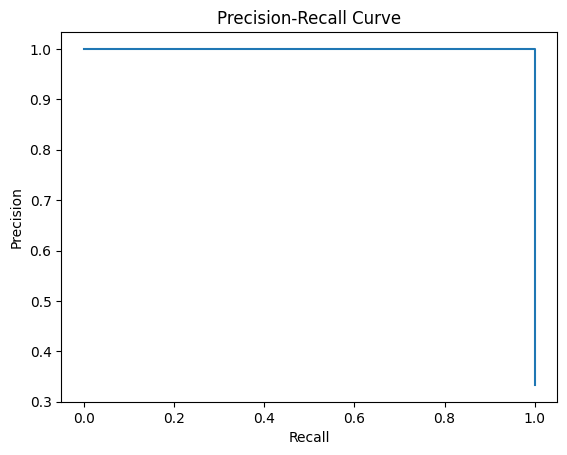

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


**20. Train Logistic Regression with different solvers and compare accuracy**

In [21]:
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model_solver = LogisticRegression(solver=solver)
    model_solver.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {accuracy_score(y_test, model_solver.predict(X_test))}")


Solver: liblinear, Accuracy: 1.0
Solver: saga, Accuracy: 1.0
Solver: lbfgs, Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**21. Train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare accuracy**

In [22]:
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model_solver = LogisticRegression(solver=solver)
    model_solver.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {accuracy_score(y_test, model_solver.predict(X_test))}")


Solver: liblinear, Accuracy: 1.0
Solver: saga, Accuracy: 1.0
Solver: lbfgs, Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**22. Train Logistic Regression and evaluate using Matthews Correlation Coefficient (MCC)**

In [23]:
from sklearn.metrics import matthews_corrcoef

print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_test, y_pred))


Matthews Correlation Coefficient (MCC): 1.0


**23. Train Logistic Regression on both raw and standardized data, compare accuracy**

In [24]:
# Without scaling
model.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, model.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, model.predict(X_test_scaled))

print("Accuracy without Scaling:", acc_raw)
print("Accuracy with Scaling:", acc_scaled)


Accuracy without Scaling: 1.0
Accuracy with Scaling: 1.0


**24. Train Logistic Regression and find the optimal C using cross-validation**

In [25]:
from sklearn.model_selection import cross_val_score

C_values = [0.01, 0.1, 1, 10, 100]
best_score = 0
best_C = None

for C in C_values:
    model_C = LogisticRegression(C=C)
    scores = cross_val_score(model_C, X, y, cv=5)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_C = C

print(f"Best C: {best_C} with Accuracy: {best_score}")


Best C: 0.01 with Accuracy: 1.0


**25. Train Logistic Regression, save the trained model using joblib, and load it again to make predictions**

In [26]:
import joblib

# Save the model
joblib.dump(model, "logistic_model.pkl")

# Load the model
loaded_model = joblib.load("logistic_model.pkl")

# Make predictions
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))


Loaded Model Accuracy: 0.6666666666666666
